In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("../../Data/Raw/flightLogData.csv")

In [3]:
data.head()

,Time,Altitude,Vertical_velocity,Vertical_acceleration,Gravitational_acceleration
0,0.00,0.000000,0.000000,-7.6787,9.7757
1,0.01,0.000000,0.000000,-3.7418,9.7757
2,0.02,0.000000,0.000000,-1.2441,9.7757
3,0.03,0.000000,0.000000,0.5562,9.7757
4,0.04,0.000028,0.005567,2.3568,9.7757


In [4]:
def plot(df):
    plt.figure(figsize=(20, 10))
    plt.plot(df.Time, df['Altitude'],  linewidth=2, color="r", label="Altitude")
    plt.plot(df.Time, df['Vertical_velocity'],  linewidth=2, color="y", label="Vertical_velocity")
    plt.plot(df.Time, df['Vertical_acceleration'],  linewidth=2, color="b", label="Vertical_acceleration")
    plt.legend()
    plt.show()

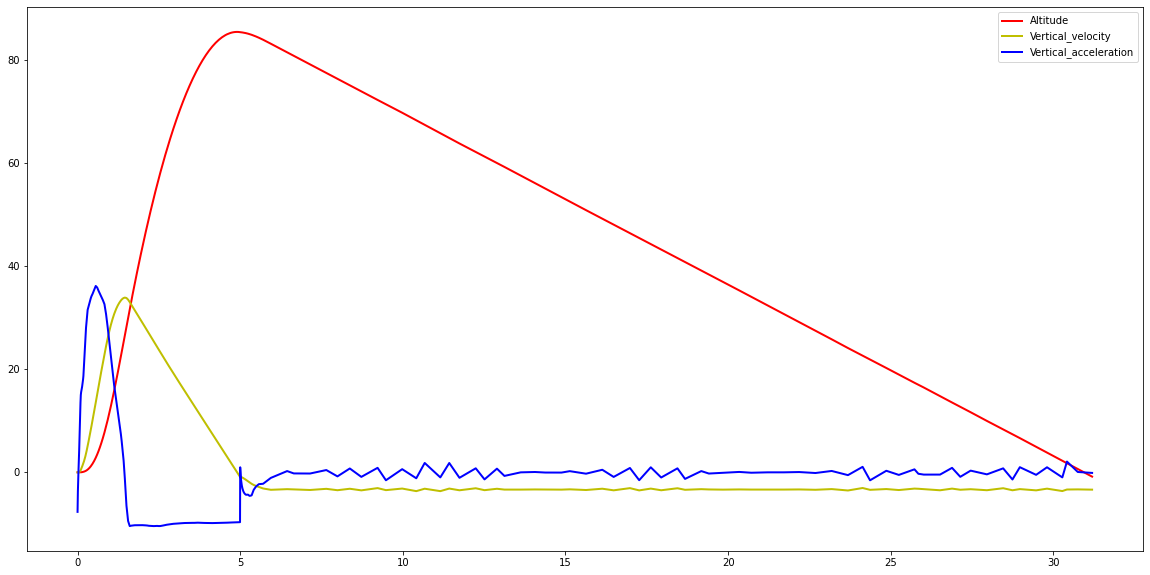

In [5]:
plot(df=data)

## Apogee 4.9947 seconds

In [6]:
def detect_apogee(df):
    def by_alitude(df):
        status = str()
        n = 0
        for i in range(len(df['Altitude'])):
            if i == 0:
                prev = 0
            else:
                prev = df['Altitude'][i - 1]
            if n == 3:
                status = "Apogee at : " + str(df['Time'][i])
            if df['Altitude'][i] < prev:
                n = n + 1
            else:
                n = 0
        if status[:6] == 'Apogee':
            return status
        else:
            return "Apogee not detected"
    def by_velocity(df):
        status = str()
        for i in range(len(df['Vertical_velocity'])):
            if i == 0:
                prev = 0
            else:
                prev = df['Vertical_velocity'][i - 1]
            if df['Time'][i] > 1.0:
                if (df['Vertical_velocity'][i] <= 1) and (df['Vertical_velocity'][i] >= -1):
                    status = "Apogee at : " + str(df['Time'][i])
                    break
        if status[:6] == 'Apogee':
            return status
        else:
            return "Apogee not detected"
    def by_acceleration(df):
        status = str()
        for i in range(len(df['Vertical_acceleration'])):
            if i == 0:
                prev = 0
            else:
                prev = df['Vertical_acceleration'][i - 1]
            if df['Time'][i] > 2.0:
                if (df['Vertical_acceleration'][i] <= 1) and (df['Vertical_acceleration'][i] >= -1):
                    status = "Apogee at : " + str(df['Time'][i])
                    break
        if status[:6] == 'Apogee':
            return status
        else:
            return "Apogee not detected"
    h_status = by_alitude(df)
    v_status = by_velocity(df)
    a_status = by_acceleration(df)
    feedback = "Alitude: {}\nVelocity: {}\nAcceleration: {}".format(h_status, v_status, a_status)
    return feedback

In [7]:
print(detect_apogee(df=data))

Alitude: Apogee at : 5.0035
Velocity: Apogee at : 4.8447
Acceleration: Apogee at : 5.0002


In [8]:
temp_df = data[['Altitude', "Vertical_velocity", "Vertical_acceleration"]]
temp_df.head()

,Altitude,Vertical_velocity,Vertical_acceleration
0,0.000000,0.000000,-7.6787
1,0.000000,0.000000,-3.7418
2,0.000000,0.000000,-1.2441
3,0.000000,0.000000,0.5562
4,0.000028,0.005567,2.3568


In [9]:
noise = np.random.normal(0, 1, temp_df.shape)
noisy_df = temp_df + noise
noisy_df.head()

,Altitude,Vertical_velocity,Vertical_acceleration
0,-0.978658,-1.534643,-8.812878
1,-0.568795,-0.765073,-4.435261
2,0.661107,-0.285532,-1.368635
3,-0.878179,0.285962,0.180892
4,0.019932,-0.051550,3.216896


In [10]:
noisy_df['Time'] = data['Time']

In [11]:
noisy_df.head()

,Altitude,Vertical_velocity,Vertical_acceleration,Time
0,-0.978658,-1.534643,-8.812878,0.00
1,-0.568795,-0.765073,-4.435261,0.01
2,0.661107,-0.285532,-1.368635,0.02
3,-0.878179,0.285962,0.180892,0.03
4,0.019932,-0.051550,3.216896,0.04


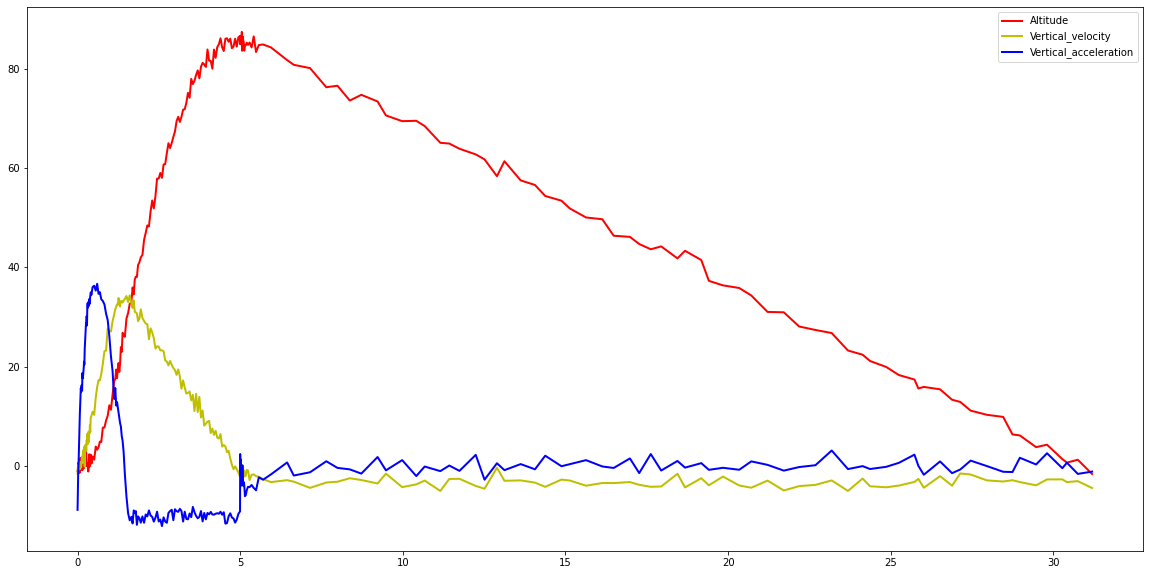

In [12]:
plot(df=noisy_df)

In [13]:
print(detect_apogee(df=noisy_df))

Alitude: Apogee at : 27.455
Velocity: Apogee at : 4.7447
Acceleration: Apogee at : 5.0035


## Standard deviation from 1 to 10

## Mean == 0

In [14]:
temp_df = data[['Altitude', "Vertical_velocity", "Vertical_acceleration"]]
for i in range(0, 10, 1):
    noise = np.random.normal(0, i, temp_df.shape)
    noisy_df = temp_df + noise
    noisy_df['Time'] = data['Time']
    vals = detect_apogee(df=noisy_df)
    print("\n", vals)


 Alitude: Apogee at : 5.0035
Velocity: Apogee at : 4.8447
Acceleration: Apogee at : 5.0002

 Alitude: Apogee at : 31.189
Velocity: Apogee at : 4.8447
Acceleration: Apogee at : 5.0109

 Alitude: Apogee at : 28.455
Velocity: Apogee at : 4.7447
Acceleration: Apogee at : 5.0109

 Alitude: Apogee at : 29.468000000000004
Velocity: Apogee at : 4.5447
Acceleration: Apogee at : 5.0360000000000005

 Alitude: Apogee at : 25.728
Velocity: Apogee at : 5.0002
Acceleration: Apogee at : 5.0002

 Alitude: Apogee at : 31.189
Velocity: Apogee at : 4.5947
Acceleration: Apogee at : 5.0109

 Alitude: Apogee at : 23.684
Velocity: Apogee at : 4.5947
Acceleration: Apogee at : 2.7947

 Alitude: Apogee at : 25.728
Velocity: Apogee at : 4.0447
Acceleration: Apogee at : 3.2447

 Alitude: Apogee at : 22.684
Velocity: Apogee at : 4.5447
Acceleration: Apogee at : 2.2947

 Alitude: Apogee at : 25.728
Velocity: Apogee at : 3.1947
Acceleration: Apogee at : 3.4947


## Markdown mean == 1

In [15]:
temp_df = data[['Altitude', "Vertical_velocity", "Vertical_acceleration"]]
for i in range(0, 10, 1):
    noise = np.random.normal(1, i, temp_df.shape)
    noisy_df = temp_df + noise
    noisy_df['Time'] = data['Time']
    vals = detect_apogee(df=noisy_df)
    print("\n", vals)


 Alitude: Apogee at : 5.0035
Velocity: Apogee at : 4.9447
Acceleration: Apogee at : 5.0109

 Alitude: Apogee at : 28.741
Velocity: Apogee at : 4.9447
Acceleration: Apogee at : 5.0002

 Alitude: Apogee at : 30.416
Velocity: Apogee at : 4.8947
Acceleration: Apogee at : 5.0035

 Alitude: Apogee at : 30.274
Velocity: Apogee at : 4.6947
Acceleration: Apogee at : 5.0427

 Alitude: Apogee at : 27.955
Velocity: Apogee at : 4.7947
Acceleration: Apogee at : 5.015

 Alitude: Apogee at : 26.015
Velocity: Apogee at : 4.8447
Acceleration: Apogee at : 4.5947

 Alitude: Apogee at : 22.684
Velocity: Apogee at : 5.03
Acceleration: Apogee at : 2.2947

 Alitude: Apogee at : 14.377
Velocity: Apogee at : 4.7447
Acceleration: Apogee at : 3.1447

 Alitude: Apogee at : 12.892999999999999
Velocity: Apogee at : 3.9947
Acceleration: Apogee at : 2.7947

 Alitude: Apogee at : 27.955
Velocity: Apogee at : 4.3447
Acceleration: Apogee at : 2.6447


## Mean == 2

In [16]:
temp_df = data[['Altitude', "Vertical_velocity", "Vertical_acceleration"]]
for i in range(0, 10, 1):
    noise = np.random.normal(1, i, temp_df.shape)
    noisy_df = temp_df + noise
    noisy_df['Time'] = data['Time']
    vals = detect_apogee(df=noisy_df)
    print("\n", vals)


 Alitude: Apogee at : 5.0035
Velocity: Apogee at : 4.9447
Acceleration: Apogee at : 5.0109

 Alitude: Apogee at : 30.274
Velocity: Apogee at : 4.8447
Acceleration: Apogee at : 5.0002

 Alitude: Apogee at : 30.274
Velocity: Apogee at : 4.6947
Acceleration: Apogee at : 5.0002

 Alitude: Apogee at : 25.848000000000003
Velocity: Apogee at : 4.9447
Acceleration: Apogee at : 5.0002

 Alitude: Apogee at : 28.968000000000004
Velocity: Apogee at : 3.9447
Acceleration: Apogee at : 2.5947

 Alitude: Apogee at : 29.468000000000004
Velocity: Apogee at : 4.5947
Acceleration: Apogee at : 2.4447

 Alitude: Apogee at : 28.455
Velocity: Apogee at : 4.2447
Acceleration: Apogee at : 5.1246

 Alitude: Apogee at : 29.803
Velocity: Apogee at : 3.1947
Acceleration: Apogee at : 3.2947

 Alitude: Apogee at : 30.749000000000002
Velocity: Apogee at : 4.0447
Acceleration: Apogee at : 2.6947

 Alitude: Apogee at : 16.980999999999998
Velocity: Apogee at : 4.1447
Acceleration: Apogee at : 3.5447


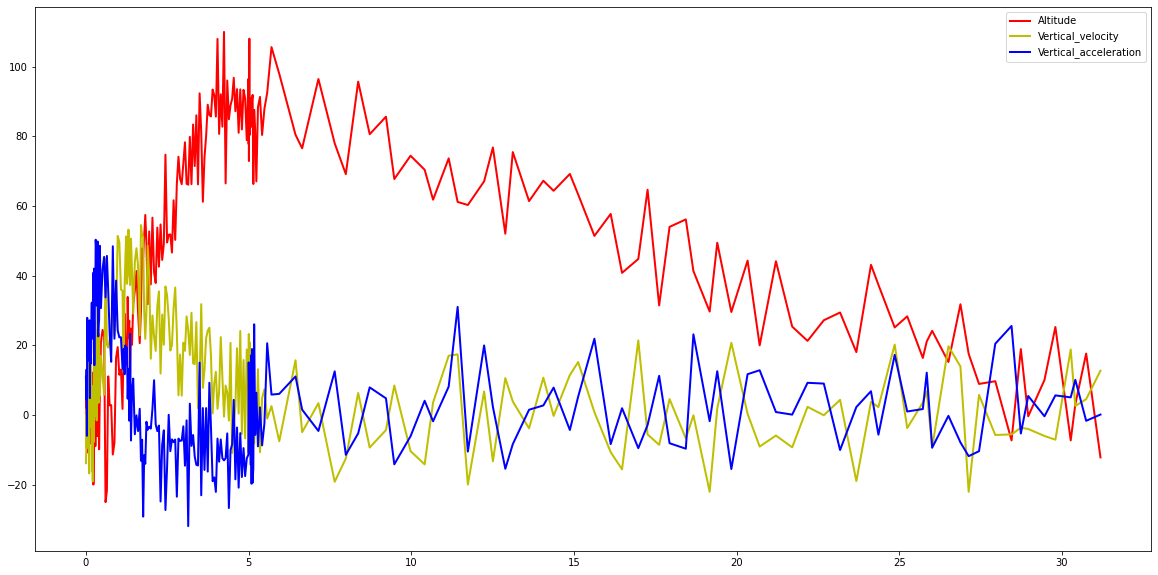

In [17]:
temp_df = data[['Altitude', "Vertical_velocity", "Vertical_acceleration"]]
noise = np.random.normal(3, 10, temp_df.shape)
noisy_df = temp_df + noise
noisy_df['Time'] = data['Time']
# vals = detect_apogee(df=noisy_df)
plot(df=noisy_df)

In [18]:
q = 0.001
A = np.array([[1.0, 0.05, 0.00125], [0, 1.0, 0.05], [0, 0, 1]])
H = np.array([[1.0, 0.0, 0.0],[ 0.0, 0.0, 1.0]])
P = np.array([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
R = np.array([[0.5, 0.0], [0.0, 0.0012]])
Q = np.array([[q, 0.0, 0.0], [0.0, q, 0.0], [0.0, 0.0, q]])
I = np.identity(3)
x_hat = np.array([[0.0], [0.0], [0.0]])
Y = np.array([[0.0], [0.0]])

In [19]:
new_altitude = []
new_acceleration = []
new_velocity = []

In [20]:
for altitude, az in zip(noisy_df['Altitude'], noisy_df['Vertical_acceleration']):
    Z = np.array([[altitude], [az]])
    
    x_hat_minus = np.dot(A, x_hat)
    P_minus = np.dot(np.dot(A, P), np.transpose(A)) + Q
    K  = np.dot(np.dot(P_minus, np.transpose(H)), np.linalg.inv((np.dot(np.dot(H, P_minus), np.transpose(H)) + R)))
    Y = Z - np.dot(H, x_hat_minus)
    x_hat = x_hat_minus + np.dot(K, Y)
    P = np.dot((I - np.dot(K, H)), P_minus)
    Y = Z - np.dot(H, x_hat_minus)
    s = x_hat[0];
    v = x_hat[1];
    ac = x_hat[2];
    new_altitude.append(float(s))
    new_velocity.append(float(v))
    new_acceleration.append(float(ac))

In [21]:
new_altitude[1]

2.678376999730588

In [22]:
filtered_df = data[['Time']]
# filtered_df.insert(loc=0, column='Altitude', value=new_altitude)

filtered_df['Altitude'] = new_altitude
filtered_df['Vertical_acceleration'] = new_acceleration
filtered_df['Vertical_velocity'] = new_velocity
filtered_df.head()

<ipython-input-22-7341b578c0f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Altitude'] = new_altitude
<ipython-input-22-7341b578c0f0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Vertical_acceleration'] = new_acceleration
<ipython-input-22-7341b578c0f0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,Time,Altitude,Vertical_acceleration,Vertical_velocity
0,0.00,0.332966,10.884824,0.559611
1,0.01,2.678377,6.687535,1.329847
2,0.02,5.349705,10.514945,2.943738
3,0.03,2.045329,0.828827,0.627319
4,0.04,-0.560140,16.737484,-1.454494


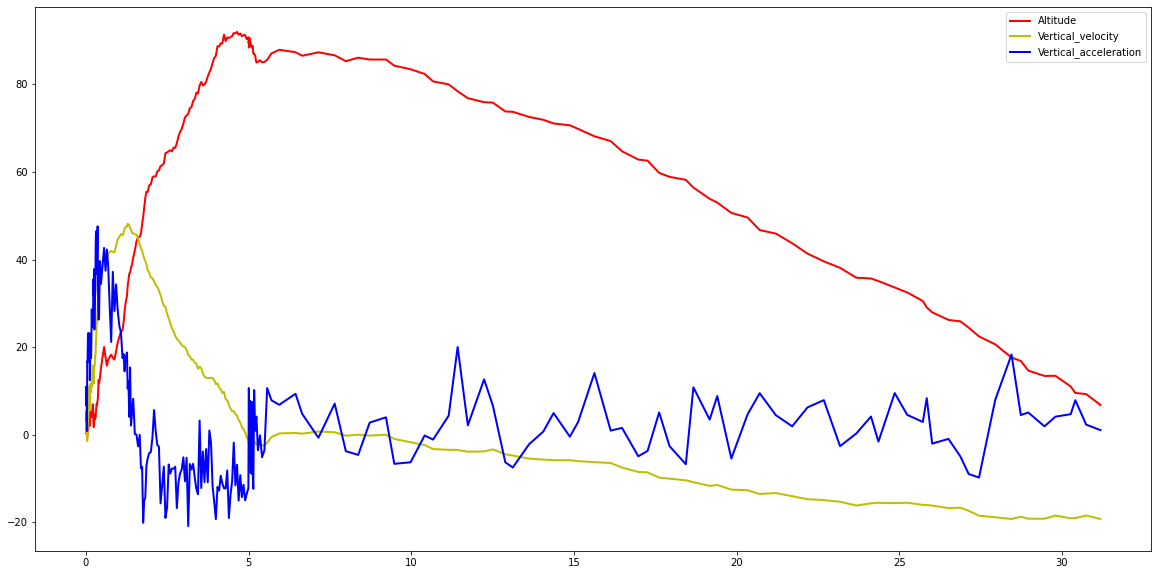

In [23]:
plot(df=filtered_df)

In [24]:
print(detect_apogee(filtered_df))

Alitude: Apogee at : 31.189
Velocity: Apogee at : 4.8947
Acceleration: Apogee at : 2.0447
